In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
M=4
P=2**M

Ns=10**4
Np=P

epsilon=0.01
Time_scale=int((300*P)/epsilon)

## 1. Gain per investor category

In [3]:
def ABM(Ns,Np,P,epsilon,Time_scale):
    
    states=np.arange(1,P+1)
    a_s=[]

    a=np.random.choice([-1,1],(Ns,P))
    Omega=np.random.normal(0,Np**(1/2),P)

    U0=np.random.normal(0,1,Ns)
    mu0=random.choice(states)

    A=[]
    U=np.copy(U0)
    mu=mu0
    mu_list=[mu0]
    for t in range(Time_scale):
        
        nt=np.heaviside(U,1)
        a_s.append(np.sum(nt*a[:,mu-1]))

        A.append(Omega[mu-1]+np.sum(nt*a[:,mu-1]))
        U=U-a[:,mu-1]*A[t]-epsilon
        mu=int((2*mu)%(2**M)+np.heaviside(A[t],1))
        mu_list.append(mu)

    return A,mu_list,a_s,Omega

In [4]:
def get_gains(Ns,Np,P,epsilon,Time_scale):

    Gs=0
    Gp=0
    
    A,mu_list,a_s,Omega=ABM(Ns,Np,P,epsilon,Time_scale)
   

    for t in range(int(200*P/epsilon),Time_scale):
        Gs+=(-a_s[t]*A[t])
        Gp+=(-Omega[mu_list[t]-1]*A[t])

    Gs/=Time_scale
    Gp/=Time_scale
    
    return Gs,Gp

let us take $N_p = 16$ and vary $N_s$

In [5]:
Ns_list=[10,50,100,500,1000,5000,10000]
Gs_list=[]
Gp_list=[]

for Ns in Ns_list:

    Gs,Gp=get_gains(Ns,Np,P,epsilon,Time_scale)
    Gs_list.append(Gs)
    Gp_list.append(Gp)

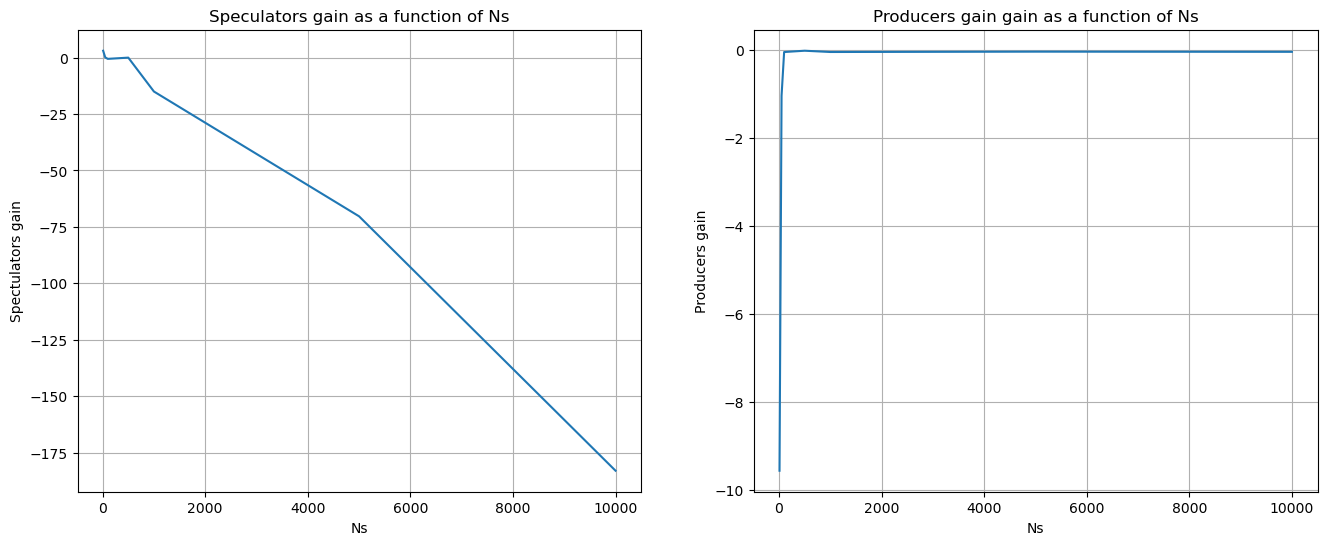

In [6]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].plot(Ns_list,Gs_list)
ax[0].set_xlabel('Ns')
ax[0].set_ylabel('Spectulators gain')
ax[0].set_title('Speculators gain as a function of Ns')
ax[0].grid()

ax[1].plot(Ns_list,Gp_list)
ax[1].set_xlabel('Ns')
ax[1].set_ylabel('Producers gain')
ax[1].set_title('Producers gain gain as a function of Ns')
ax[1].grid()

plt.show()

We notice that :

-The gain of the speculators is a decreasing function of $N_s$.\
-The gain of the producers is an increasing function of $N_s$.\
-The gain of the speculators is negative.\
-The gain of the producers is negative.

let us try to explain/interpret these results : 
We can already observe that the more speculators we introduce the more demande we inject and this comes in favour of suppliers.\
From a mathematical point of view, we know that : 



$$G_{spec}(t) = - A_{spec}(t)A(t) $$ 
$$G_{prod}(t) = - \Omega(t)A(t) $$ 

with  $$A(t)= \Omega (t)+A_{spec}(t)$$ $$A_{spec}(t)= - \sum_{i=1}^{N_s} n_i(t) a_{i,\mu(t)}$$ $$\Omega \sim \mathcal{N}(0, N_p)$$
 
Thus if $N_s$ increases, $A_{spec}(t)$ dominates $\Omega (t)$ and we would have $A(t) ~ A_{spec}(t)$ and consequentily from above $E[G_{spec}(t)] = - E[A_{spec}(t)^2] $ with a higher magnitude as $N_s$ inceases. This explains why the average speculators gain is a negative decreasing function of $N_s$

On the other hand, 

We have $E[G_{prod}(t)] = E[-\Omega(t)A(t)] = \sum_{\mu} E[-\Omega(t)A(t)|\mu] = \sum_{\mu} -\Omega(t)E[A(t)|\mu]$.\
However we have seen from the previous TP that the more speculators we introduce the more predictibility is consumed resulting in H0=0 i.e $\sum_{\mu} E[A(t)|\mu]^2 = 0$ and thus $E[A(t)|\mu] = 0$ for every $\mu$.\
This leads with caluclation above that $E[G_{prod}(t)] = 0$ which is the result that we have observed.\


Let us take parameter $N_s = 10$ and vary $N_p$

In [20]:
Np_list=[500,1000,5000,10000,50000,60000]
Ns=1000
Gs_list=[]
Gp_list=[]
for Np in Np_list:
    
    Time_scale=int((300*P)/epsilon)
    Gs,Gp=get_gains(Ns,Np,P,epsilon,Time_scale)
    Gs_list.append(Gs)
    Gp_list.append(Gp)

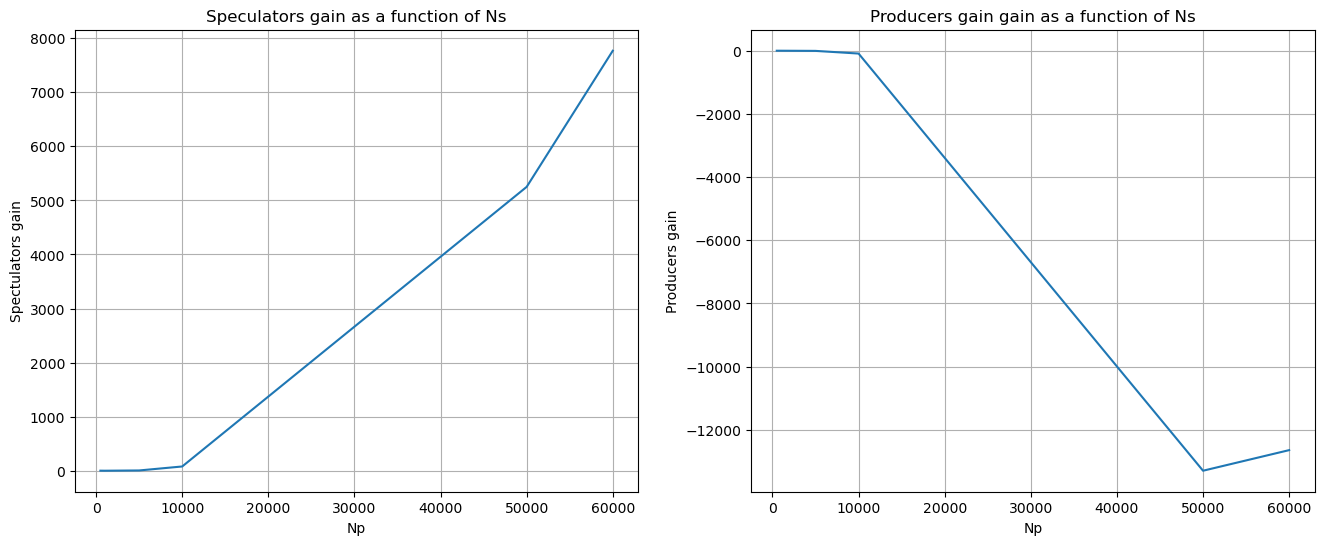

In [21]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].plot(Np_list,Gs_list)
ax[0].set_xlabel('Np')
ax[0].set_ylabel('Spectulators gain')
ax[0].set_title('Speculators gain as a function of Ns')
ax[0].grid()

ax[1].plot(Np_list,Gp_list)
ax[1].set_xlabel('Np')
ax[1].set_ylabel('Producers gain')
ax[1].set_title('Producers gain gain as a function of Ns')
ax[1].grid()

plt.show()

We notice that :

-The gain of the speculators is an increasing function of $N_p$.\
-The gain of the producers is an decreasing function of $N_p$.\
-The gain of the speculators is positive.\
-The gain of the producers is negative.

let us try to explain/interpret these results : 
We can already observe as in the previous case that the more producers we introduce the more offer we inject and this comes in favour of the speculators.\
From a mathematical point of view, we know that : 



$$G_{spec}(t) = - A_{spec}(t)A(t) $$ 
$$G_{prod}(t) = - \Omega(t)A(t) $$ 

with  $$A(t)= \Omega (t)+A_{spec}(t)$$ $$A_{spec}(t)= - \sum_{i=1}^{N_s} n_i(t) a_{i,\mu(t)}$$ $$\Omega \sim \mathcal{N}(0, N_p)$$
 
Thus if $N_p$ increases, $\Omega (t)$ has higher chances of attaining great values and dominating $A_{spec}(t)$  and we would have $A(t) ~ \Omega(t)$ and consequentily from above $E[G_{prod}(t)] = - E[\Omega^2] $ with a higher magnitude as $N_p$ inceases. This explains why the average producers gain is a negative decreasing function of $N_p$

On the other hand, 

The more producers we have the more predictability we inject into the market the more speculators are able to profit from it to make a gain.


## 2. Real gain/expected gain

In [9]:
M=4
P=2**M

Ns=100
Np=P

epsilon=0.01
Time_scale=int((300*P)/epsilon)

In [10]:
A,mu_list,a_s,Omega=ABM(Ns,Np,P,epsilon,Time_scale)

mu_occ=np.zeros(P)
H0_mu=np.zeros(P)

for t in range(int((200*P)/epsilon),Time_scale,10*P):
    mu=mu_list[t]
    H0_mu[mu-1]+=A[t]
    mu_occ[mu-1]+=1

H0_mu=(H0_mu/mu_occ)

In [11]:
Naive_gain=np.mean(np.abs(H0_mu))

In [12]:
a_best=-np.array([1 if x >=0 else -1 for x in H0_mu])

In [13]:
def ABM_best(Ns,Np,P,epsilon,Time_scale,a_best):
    
    Gain_best=0

    states=np.arange(1,P+1)
    a_s=[]

    a=np.random.choice([-1,1],(Ns,P))
    Omega=np.random.normal(0,Np**(1/2),P)

    U0=np.random.normal(0,1,Ns)
    mu0=random.choice(states)

    A=[]
    U=np.copy(U0)
    mu=mu0
    mu_list=[mu0]

    for t in range(Time_scale):
        
        nt=np.heaviside(U,1)
        a_s.append(np.sum(nt*a[:,mu-1]))
        A.append(Omega[mu-1]+np.sum(nt*a[:,mu-1])+a_best[mu-1])
        Gain_best+=(-a_best[mu-1]*A[-1])
        U=U-a[:,mu-1]*A[t]-epsilon
        mu=int((2*mu)%(2**M)+np.heaviside(A[t],1))
        mu_list.append(mu)

    Gain_best/=Time_scale
    
    return A,mu_list,Gain_best

In [14]:
A,mu_list,Real_gain=ABM_best(Ns,Np,P,epsilon,Time_scale,a_best)

In [15]:
print('The naive gain is : '+str(Naive_gain))
print('The real gain is : '+str(Real_gain))

The naive gain is : 0.1576457056649739
The real gain is : -0.03305152251702045


The agent uses a strategy based on the state of market on the previous date. \
Thus the aganet knows the expected value of A knowing the previous state and not the current one. \
He thus takes the opposite position with regard to the previous state which can be non-oppoisite to A with regards to the current state.
This leads to a lesser gain then the naive one.\
Had the states been related to one another (which can be the case in a more realistic scenario) this strategy could have lead to better results closer to the excpected gain.\
We can retain that the more an agent knows about the market/posesses a predictibility over the market the more he is prone to make a gain.